@channel *Task 30* (for in-class tonight): Using Python (or R) download this data (https://github.com/seanreed1111/Statistical-Rethinking-with-Python-and-PyMC3/blob/master/Data/Howell1.csv).

#1 Plot the data.

#2 Do the following classical linear regressions to predict height based on weight: (using the following subsets of the data) 
A: only adults (>18yrs old), 
B: only children (<= 18 yrs old)
C: full dataset

#3 Plot the respective regression lines versus data for each of  #2A,#2B,#2C above.

#4 Plot all three regression lines vs the full dataset.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [11]:
df=pd.read_csv('/Users/eran/Galvanize/Statistical-Rethinking-with-Python-and-PyMC3/Data/Howell1.csv',delimiter=';')

In [12]:
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


In [14]:
df.shape

(544, 4)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
height    544 non-null float64
weight    544 non-null float64
age       544 non-null float64
male      544 non-null int64
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


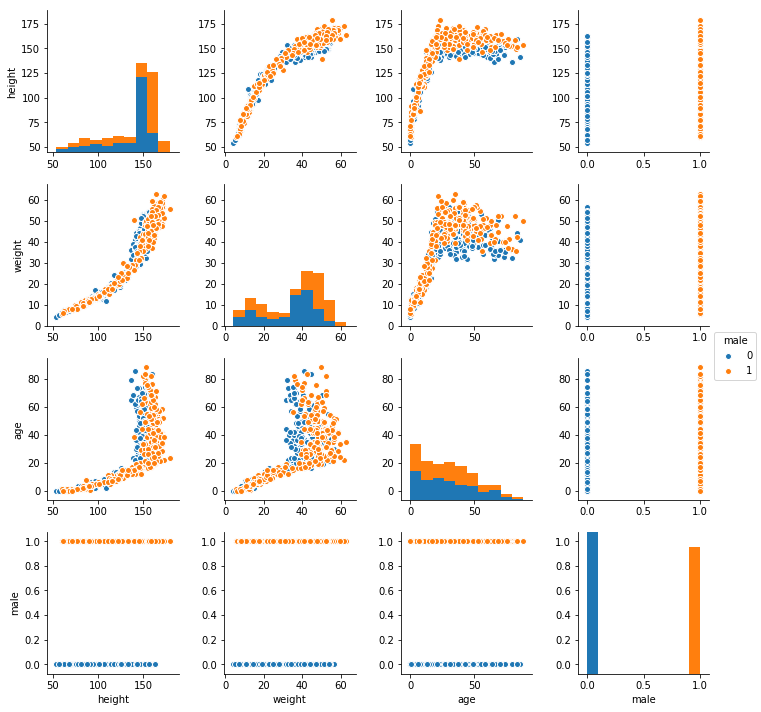

In [16]:
sns.pairplot(df,hue='male')

In [22]:
dfad=df[df['age']>18]
dfch=df[df['age']<=18]

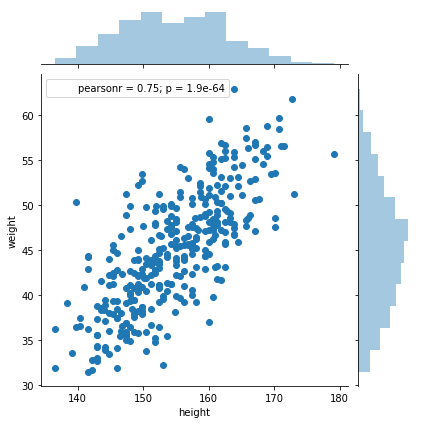

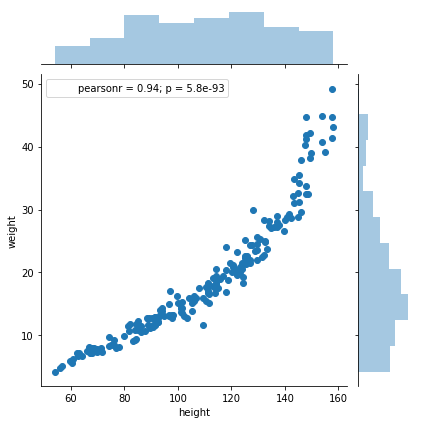

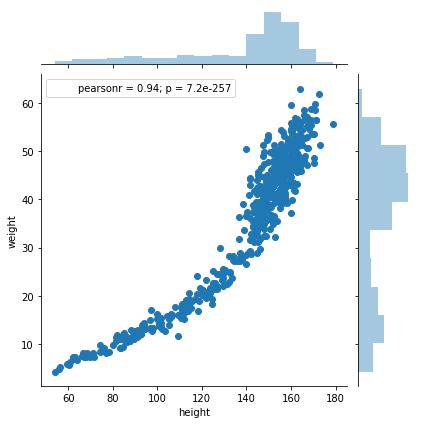

In [27]:
sns.jointplot('height','weight',dfad)
sns.jointplot('height','weight',dfch)
sns.jointplot('height','weight',df)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer

In [73]:
## Making a function for linesr regression using skitlearn (maybe better to use scipy?)
def linReg(X,y,name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    ## sacling:
    scaler=StandardScaler()
    scaler.fit(X_train)
    scaler.transform(X_train)
    scaler.transform(X_test)
    lrr=LinearRegression()
    lrr.fit(X_train,y_train)
    predss=lrr.predict(X_test)
    sc=r2_score(y_test,predss)
    print(name,sc)

In [74]:
linReg(dfch['weight'].reshape(-1, 1),dfch['height'],'height vs weight in children (r2_score) =')
linReg(dfad['weight'].reshape(-1, 1),dfad['height'],'height vs weight in adults (r2_score) =')
linReg(df['weight'].reshape(-1, 1),df['height'],'height vs weight in adults + children (r2_score) =')

height vs weight in children (r2_score) = 0.898816435145
height vs weight in adults (r2_score) = 0.506692363834
height vs weight in adults + children (r2_score) = 0.894536749623


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


## Using SciPy

### Children

In [148]:
## linear regression using SciPy
## to use scipy, to calculate r^2 score, converting pandas to numpy types
from scipy import stats
yy2=dfch['height'].as_matrix()
XX2=dfch['weight'].as_matrix()

In [149]:
slope2, intercept2, r_value2, p_value, std_err = stats.linregress(XX2,yy2)
print('height vs weight in children (r2_score) =',r_value2**2)

height vs weight in children (r2_score) = 0.882170692206


height vs weight in children


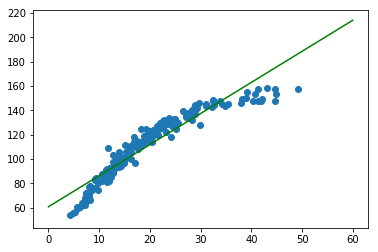

In [139]:
t=np.linspace(0,60,600)
print('height vs weight in children')
plt.plot(t,slope2*t+intercept2,color='g')
plt.scatter(XX2,yy2)
plt.show()

### Adults 

In [151]:
yy1=dfad['height'].as_matrix()
XX1=dfad['weight'].as_matrix()
slope1, intercept1, r_value1, p_value, std_err = stats.linregress(XX1,yy1)
print('height vs weight in adults (r2_score) =',r_value1**2)

height vs weight in adults (r2_score) = 0.566734522607


height vs weight in adults


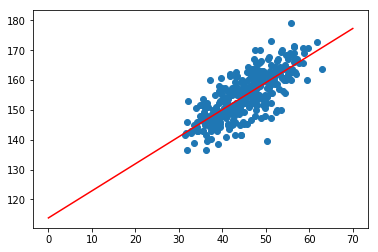

In [140]:
t=np.linspace(0,70,600)
print('height vs weight in adults')
plt.plot(t,slope1*t+intercept1,color='red')
plt.scatter(XX1,yy1)
plt.show()

### Children + Adults 

In [142]:
yy=df['height'].as_matrix()
XX=df['weight'].as_matrix()
slope, intercept, r_value, p_value, std_err = stats.linregress(XX,yy)
print('height vs weight in adults + children (r2_score) =',r_value**2)

height vs weight in adults + children (r2_score) = 0.88514642005


In [120]:
yy=df['height'].as_matrix()
XX=df['weight'].as_matrix()
slope, intercept, r_value, p_value, std_err = stats.linregress(XX,yy)
print('height vs weight in adults + children (r2_score) =',r_value**2)

height vs weight in adults + children (r2_score) = 0.88514642005


height vs weight in adults + children


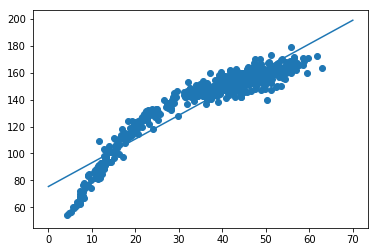

In [121]:
t=np.linspace(0,70,600)
print('height vs weight in adults + children')
plt.plot(t,slope*t+intercept)
plt.scatter(XX,yy)
plt.show()

height vs weight
----------------
Children r2_score = 0.882170692206
Adults r2_score = 0.566734522607
adults + children r2_score = 0.88514642005


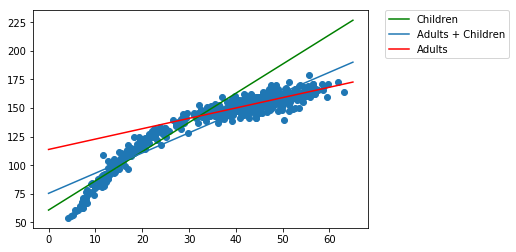

In [160]:
t=np.linspace(0,65,600)
print('height vs weight')
print('----------------')
print('Children r2_score =',r_value2**2)
print('Adults r2_score =',r_value1**2,)
print('adults + children r2_score =',r_value**2)
plt.scatter(XX,yy)
plt.plot(t,slope2*t+intercept2,color='g',label="Children")
plt.plot(t,slope*t+intercept, label="Adults + Children")
plt.plot(t,slope1*t+intercept1,color='r',label="Adults")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()